

<img src='regression.png' />


___


# Linear Regression Project # 1

Hello everyone! This is my first python project from <a href='https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/'> Python-Data-Science-and-Machine-Learning-Bootcamp.</a> I'll analyze data from an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. The goal is to help the company decide whether to focus their efforts on their mobile app experience or their website.

## Data set description

I'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes.
* Time on Website: Average time spent on Website in minutes.
* Length of Membership: How many years the customer has been a member. 
* Yearly Amount Spent: Average money spent per year.

Let's start!

## Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the Data


In [2]:
df = pd.read_csv('Ecommerce Customers')

**Checking the head(), the info() and the describe() method of the data frame.**

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


## Exploratory Data Analysis
___

**Creating a jointplot to compare the Time on Website and Yearly Amount Spent columns.**

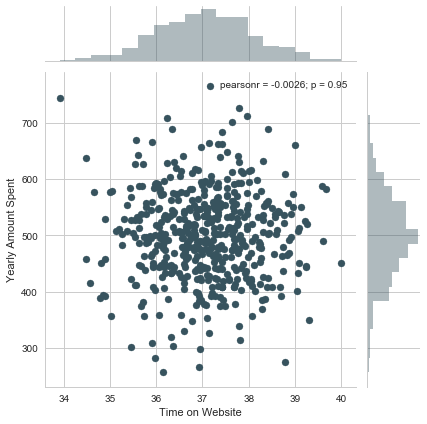

In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x=df['Time on Website'], y=df['Yearly Amount Spent'],kind='scatter')

It seems there is no correlation between Time on Website and Yearly Amount Spent.

** Doing the same but with the Time on App variable instead. **

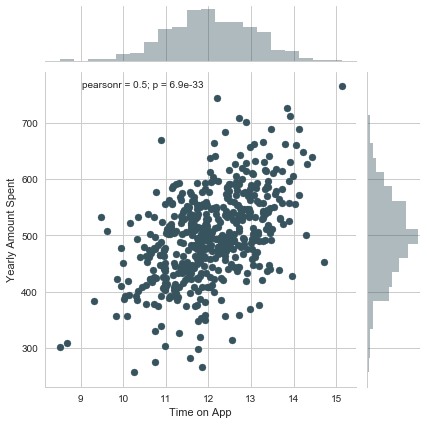

In [7]:
sns.jointplot(x=df['Time on App'], y=df['Yearly Amount Spent'],kind='scatter')

In this case correlation is more evident. There exist a relationship between Time on App and Yearly Amount Spent.

** Comparing Time on App and Length of Membership.**

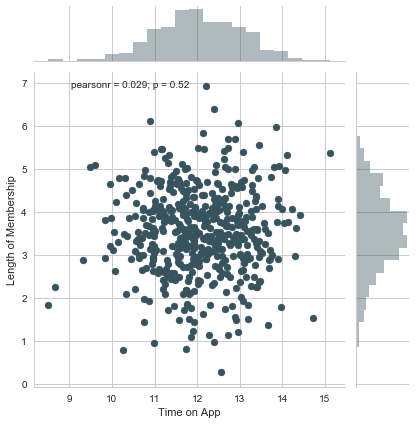

In [8]:
sns.jointplot(x=df['Time on App'], y=df['Length of Membership'],kind='scatter')

**Now, I explore these types of relationships across the entire data set using [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot).**

C:\Users\Selva\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


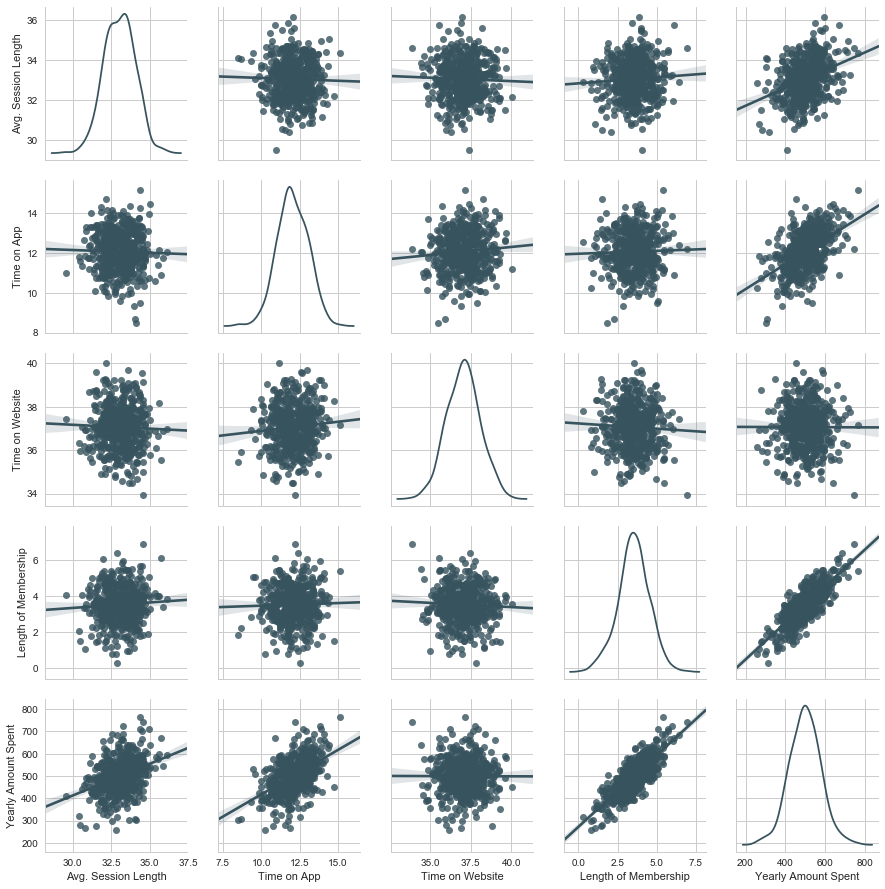

In [9]:
sns.pairplot(df, kind="reg", diag_kind="kde")

Based off this plot, the most correlated feature with Yearly Amount Spent is Length of Membership
Moreover, I won't need feature engineering, so I will work directly on raw data.

**Focusing on Yearly Amount Spent vs. Length of Membership. **

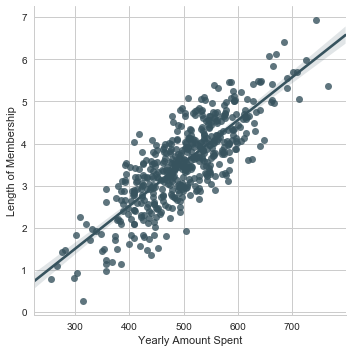

In [10]:
sns.lmplot(x='Yearly Amount Spent', y='Length of Membership', data = df)

## Training and Testing Data

**It's time to set the regressors X equal to the numerical features of the customers and the target variable y equal to the "Yearly Amount Spent".**


In [11]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

** Using model_selection.train_test_split from sklearn to split the data into training and testing sets.**

In [12]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42)

## Training the Model

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Printing out the estimated coefficients for the linear regression**

In [14]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 25.69083176  38.68815596   0.45279908  61.71050259]


## Predicting Test Data

Now that I have fit the model, I evaluate its performance by predicting off the test values.


In [15]:
y_pred = lm.predict(X_test)

** Creating a scatterplot of the real test values versus the predicted values. **

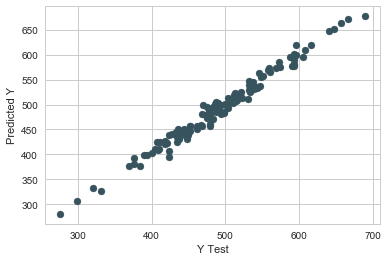

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

It seems the model predict very well.

## Evaluating the Model

It is possible to evaluate the model performance by calculating the residual sum of squares and the explained variance score (R^2).



In [17]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 8.46045417014
MSE: 105.645142963
RMSE: 10.2783823125


## Residuals

I got a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**I can plot the residuals to check if it looks normally distributed.**

C:\Users\Selva\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


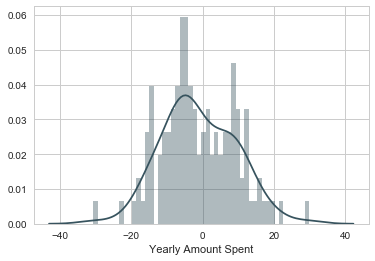

In [18]:
sns.distplot((y_test-y_pred),bins=50);

## Conclusion
I still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.


In [19]:
coefficient = pd.DataFrame(lm.coef_,X.columns)
coefficient.columns = ['Coefficient']
coefficient

,Coefficient
Avg. Session Length,25.690832
Time on App,38.688156
Time on Website,0.452799
Length of Membership,61.710503


Besed on che Coefficient we got, I suggest to focus the effort on the mobile app. In fact, the data show that for each minute spent on the app there is an increase on average of the amount spent in an year of about 38\$. On the other hand, for each minute spent on the website there is an increase on average of only 0.45\$ per year.